In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scprep
import pandas as pd

In [11]:
import torch
from scipy.stats import gaussian_kde
import numpy as np

def kde(data, points_to_evaluate=None, bandwidth=None):
    """
    Perform kernel density estimation on n-dimensional data.
    
    Args:
        data (np.ndarray or torch.Tensor): Input data of shape (n_samples, n_dimensions)
        points_to_evaluate (np.ndarray or torch.Tensor, optional): Points at which to evaluate the KDE. 
            If None, the original data points are used.
        bandwidth (float, optional): Bandwidth for KDE. If None, Scott's rule is used.
    
    Returns:
        np.ndarray or torch.Tensor: Estimated density at each point in points_to_evaluate
    """
    is_torch = isinstance(data, torch.Tensor)
    
    if is_torch:
        original_dtype = data.dtype
        original_device = data.device
        data_np = data.cpu().numpy()
    else:
        data_np = data
    
    kde = gaussian_kde(data_np.T, bw_method=bandwidth)
    
    if points_to_evaluate is None:
        points_to_evaluate = data_np
    elif is_torch and isinstance(points_to_evaluate, torch.Tensor):
        points_to_evaluate = points_to_evaluate.cpu().numpy()
    
    result = kde(points_to_evaluate.T)
    
    if is_torch:
        result = torch.tensor(result, dtype=original_dtype, device=original_device)
    
    return result


In [5]:
df = pd.read_csv('../data/mioflow_balanced_subsampled.csv', index_col=0)

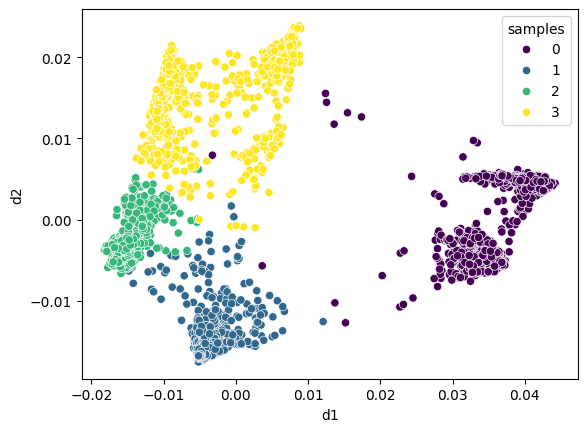

In [9]:
sns.scatterplot(df, x='d1', y='d2', hue='samples', legend='full', palette='viridis');

In [12]:
density = kde(df[['d1', 'd2']].values)

<Axes: title={'center': 'Density plot of mioflow data'}>

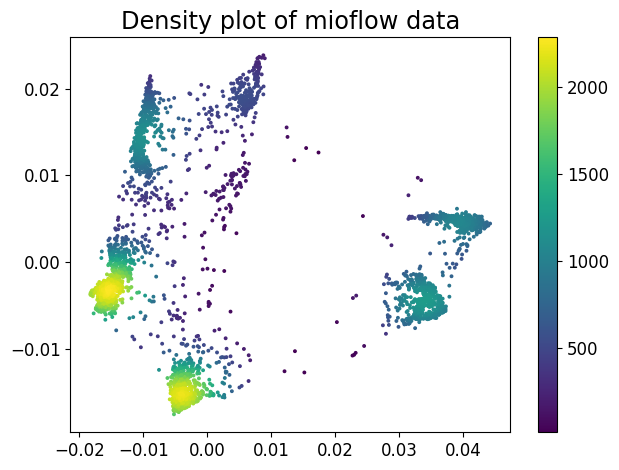

In [13]:
scprep.plot.scatter2d(df[['d1', 'd2']].values, c=density, cmap='viridis', title='Density plot of mioflow data')

In [14]:
df['samples'].value_counts()

0    1000
1    1000
2    1000
3    1000
Name: samples, dtype: int64